In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Paramètres de simulation
n_nodes = 50  # Nombre de nœuds
np.random.seed(42)  # Pour la reproductibilité

data = {
    'cpu_usage': np.random.randint(10, 100, size=n_nodes),  # Usage CPU en %
    'memory_usage': np.random.randint(10, 100, size=n_nodes),  # Usage mémoire en %
    'disk_usage': np.random.randint(10, 100, size=n_nodes),  # Usage disque en %
    'task_duration': np.random.randint(50, 500, size=n_nodes)  # Durée d'une tâche en ms
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Affichage des premières lignes
print(df.head())

# Enregistrement du DataFrame en fichier CSV
df.to_csv('ressources.csv', index=False)

   cpu_usage  memory_usage  disk_usage  task_duration
0         61            23          98            271
1         24            18          80            456
2         81            99          18            280
3         70            62          97            286
4         30            11          10            192


In [5]:
data = pd.read_csv('ressources.csv')
data.head()

,cpu_usage,memory_usage,disk_usage,task_duration
0,61,23,98,271
1,24,18,80,456
2,81,99,18,280
3,70,62,97,286
4,30,11,10,192


In [6]:
X = df[['cpu_usage', 'memory_usage', 'disk_usage']]
y = df['task_duration']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Création du modèle
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [9]:
# Calcul de l'erreur quadratique moyenne (MSE) et du coefficient de détermination (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Coefficient of Determination (R²) : {r2}")

Mean Squared Error (MSE) : 24002.329495894224
Coefficient of Determination (R²) : -0.42948760928595053


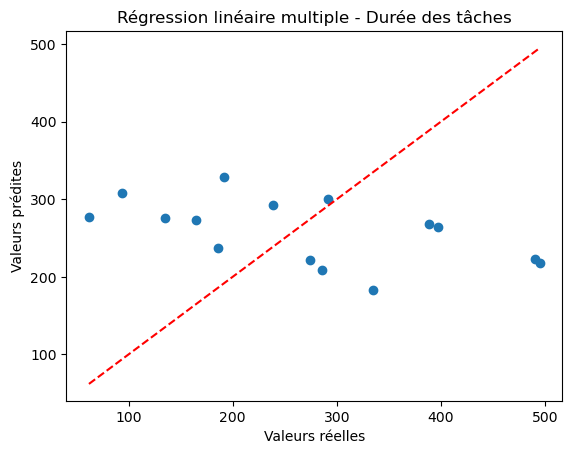

In [11]:
# Tracé des valeurs réelles vs prédites
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire multiple - Durée des tâches')
plt.show()


In [12]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

              Coefficient
cpu_usage       -0.850139
memory_usage     0.108404
disk_usage      -1.055945
